# **Categorical Data**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('big_data.csv')[['GarageQual','FireplaceQu', 'SalePrice']]
df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [4]:
df.isna().mean()

GarageQual     0.055479
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [5]:
x = df.copy()
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train['GarageQual_imputed'] = x_train['GarageQual']
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']

x_test['GarageQual_imputed'] = x_test['GarageQual']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

### **Type 1**

In [6]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isna()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isna().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isna()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isna().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isna()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isna().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isna()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isna().sum()).values




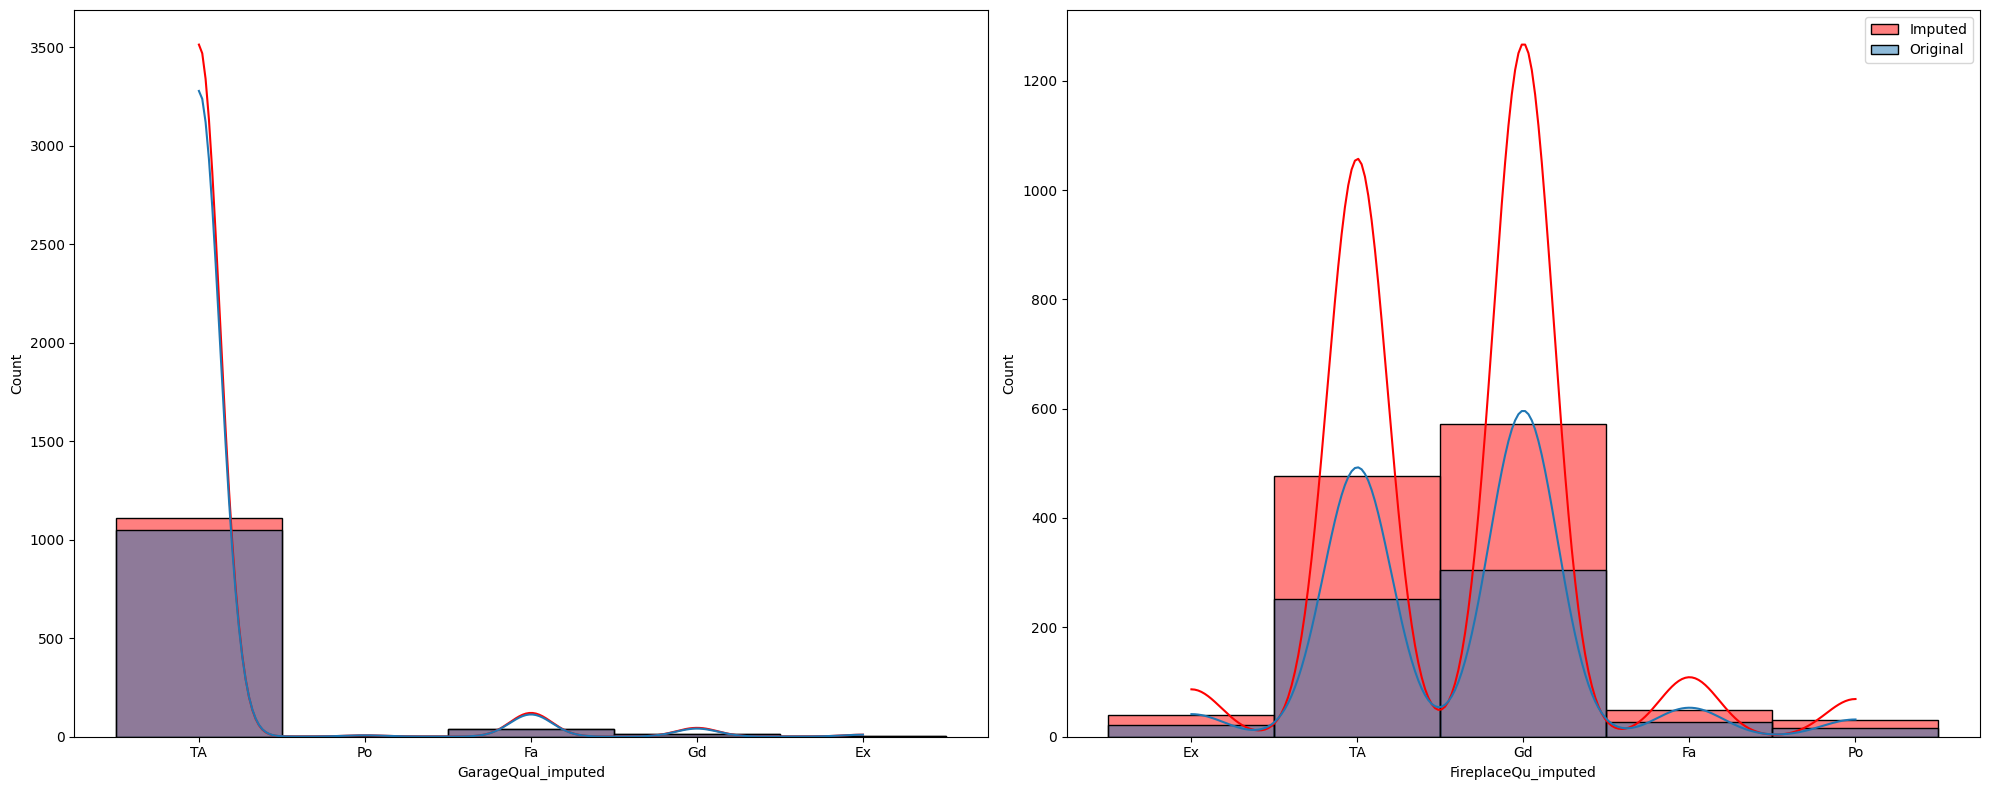

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.histplot(x_train['GarageQual_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['GarageQual'], label='Original', kde=True)

plt.subplot(122)
sns.histplot(x_train['FireplaceQu_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['FireplaceQu'], label='Original', kde=True)

plt.legend()
plt.tight_layout()
plt.show()

### **Type 2**

In [8]:
x_train['GarageQual_imputed'] = x_train.apply(
    lambda row: x_train['GarageQual'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['GarageQual']) else row['GarageQual'],
    axis=1
)
x_test['GarageQual_imputed'] = x_test.apply(
    lambda row: x_train['GarageQual'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['GarageQual']) else row['GarageQual'],
    axis=1
)


x_train['FireplaceQu_imputed'] = x_train.apply(
    lambda row: x_train['FireplaceQu'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['FireplaceQu']) else row['FireplaceQu'],
    axis=1
)
x_test['FireplaceQu_imputed'] = x_test.apply(
    lambda row: x_train['FireplaceQu'].dropna().sample(1, random_state=int(row['SalePrice'])).values[0] 
    if pd.isna(row['FireplaceQu']) else row['FireplaceQu'],
    axis=1
)



### Why we used `SalePrice` as the Random Seed
In **Type 2 (Deterministic Imputation)**, we need to ensure that the same observation always gets the same imputed value, even if we run the code multiple times. To do this, we use a specific feature of that observation as the `random_state` seed.
We chose **`SalePrice`** for three key reasons:
1.  **It is Numerical:** The `random_state` parameter in Python requires an **integer** (number). `SalePrice` is already a number (e.g., 208500), so we can pass it directly. Categorical columns like `FireplaceQu` (e.g., 'Gd', 'TA') cannot be used as seeds without complex conversion.
2.  **It is Unique/Variable:** `SalePrice` varies significantly between houses. This ensures that different houses get different "random" values, preserving the randomness of the distribution. If we used a column with few unique values (like `YrSold`), many rows would get the exact same imputed value, which would distort the data.
3.  **It has No Missing Values:** `SalePrice` is complete (0% missing). If we used a column that had missing values itself (like `FireplaceQu`), we couldn't use it as a seed for those rows.

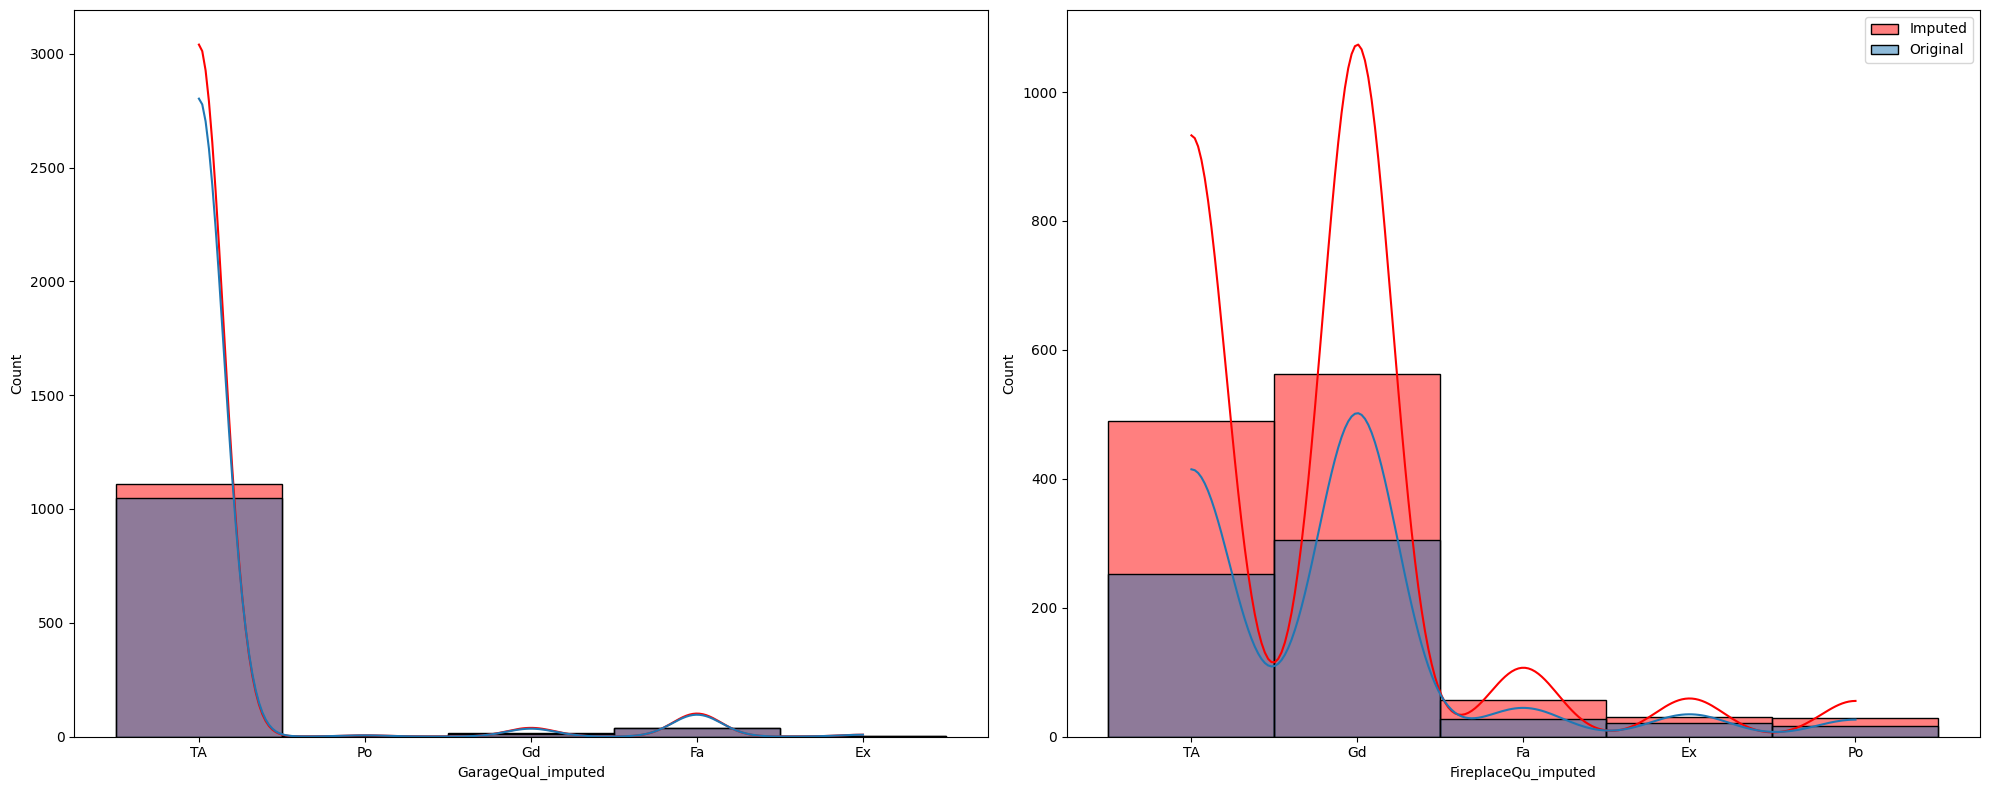

In [9]:
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.histplot(x_train['GarageQual_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['GarageQual'], label='Original', kde=True)

plt.subplot(122)
sns.histplot(x_train['FireplaceQu_imputed'], label='Imputed', color='r', kde=True)
sns.histplot(x_train['FireplaceQu'], label='Original', kde=True)

plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# checking for the change of frequency in each category of 'GarageQual' by dividing them to the length of the 'GarageQual' 

print(x_train['GarageQual'].value_counts()[0] / len(x_train['GarageQual'].dropna()))
print(x_train['GarageQual'].value_counts()[1] / len(x_train['GarageQual'].dropna()))
print(x_train['GarageQual'].value_counts()[2] / len(x_train['GarageQual'].dropna()))
print(x_train['GarageQual'].value_counts()[3] / len(x_train['GarageQual'].dropna()))
print(x_train['GarageQual'].value_counts()[4] / len(x_train['GarageQual'].dropna()))

0.9510869565217391
0.03260869565217391
0.01177536231884058
0.002717391304347826
0.0018115942028985507


In [11]:
# checking for the change of frequency in all category of 'GarageQual' by dividing them to the length of the 'GarageQual' 

x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna())

GarageQual
TA    0.951087
Fa    0.032609
Gd    0.011775
Ex    0.002717
Po    0.001812
Name: count, dtype: float64

In [12]:
x_train['GarageQual_imputed'].value_counts() / len(x_train['GarageQual'])

GarageQual_imputed
TA    0.952055
Fa    0.031678
Gd    0.011986
Ex    0.002568
Po    0.001712
Name: count, dtype: float64

In [13]:
# checking for the frequency of change

temp = pd.concat(
    [
        x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts() / len(x_train)         # len(x_train['GarageQual']) -- you can also write this
    ],
    axis=1
)

temp.columns = ['original', 'imputed']
temp


,original,imputed
TA,0.951087,0.952055
Fa,0.032609,0.031678
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [ ]:
temp2 = pd.concat(
    [
        x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts() / len(x_train)         # len(x_train['Fire']) -- you can also write this
    ],
    axis=1
)

temp2.columns = ['original', 'imputed']
temp2

# as you can see down below also in the graph in down very below, that there is a lot of variation in the data.
# hence the random imputation is not a good way of doing imputation

,original,imputed
Gd,0.491143,0.482021
TA,0.405797,0.418664
Fa,0.043478,0.047945
Ex,0.033816,0.026541
Po,0.025765,0.024829


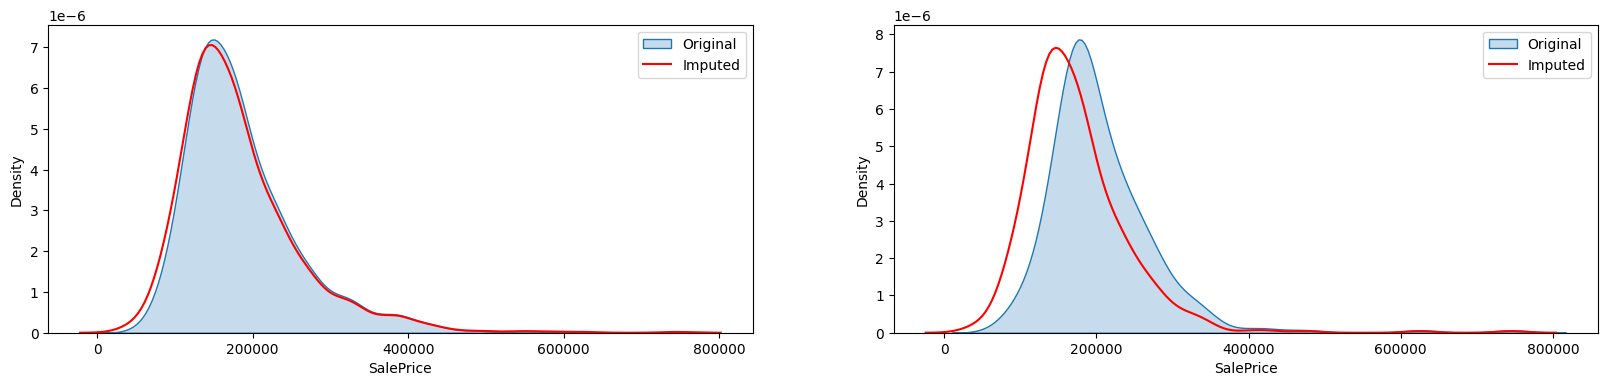

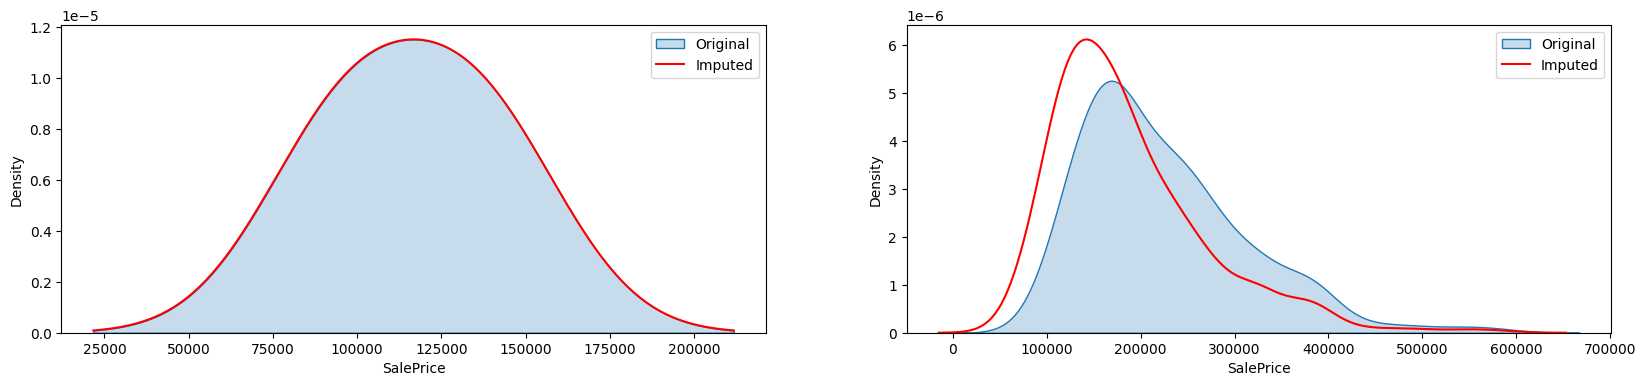

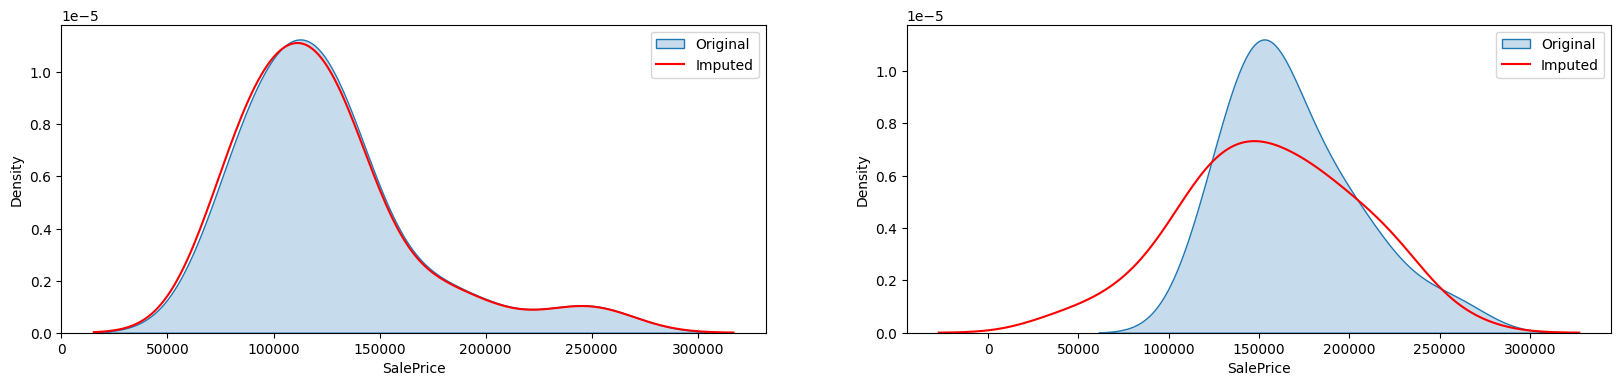

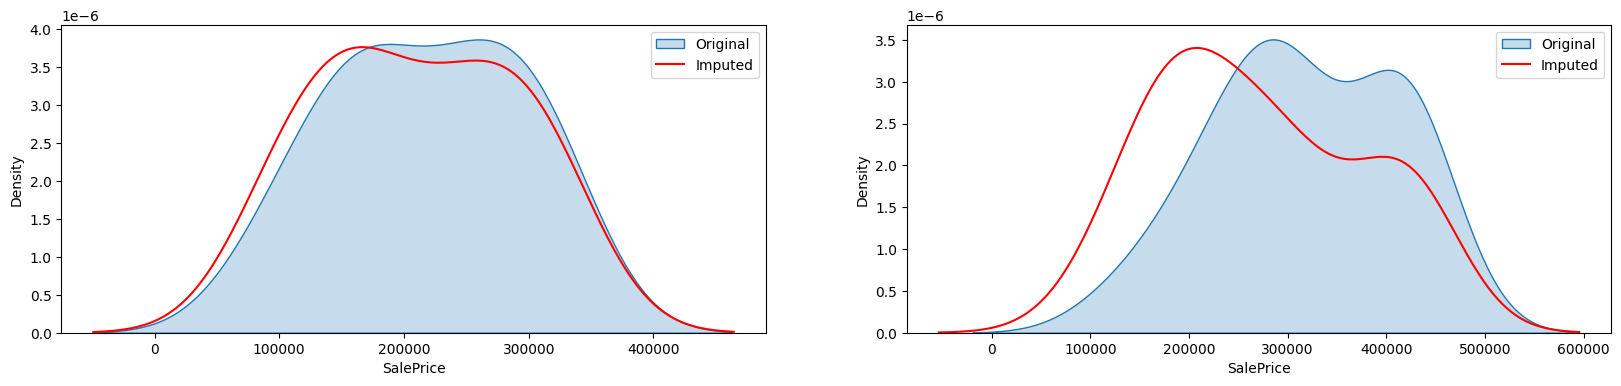

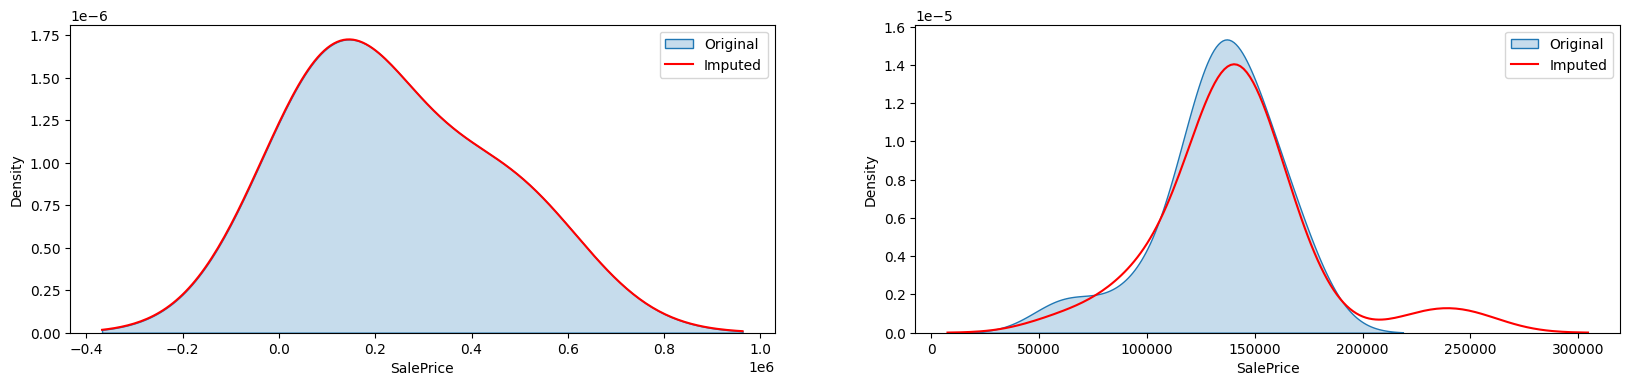

In [15]:
for category, category2 in zip(x_train['GarageQual'].dropna().unique(), x_train['FireplaceQu'].dropna().unique()):
    plt.figure(figsize=(20, 4))
    
    plt.subplot(121)
    sns.kdeplot(x_train[x_train['GarageQual'] == category]['SalePrice'], label='Original', fill=True)
    sns.kdeplot(x_train[x_train['GarageQual_imputed'] == category]['SalePrice'], label='Imputed', color='r')
    plt.legend()
    
    plt.subplot(122)
    sns.kdeplot(x_train[x_train['FireplaceQu'] == category2]['SalePrice'], label='Original', fill=True)
    sns.kdeplot(x_train[x_train['FireplaceQu_imputed'] == category2]['SalePrice'], label='Imputed', color='r')

    plt.legend()
    plt.show()


## **Cons of using `Zip`**

- **Data Loss (Truncation)**: zip stops iterating as soon as the shortest list is exhausted. If GarageQual has 5 unique categories and FireplaceQu has 6, the loop will run only 5 times, and you will completely miss the 6th category of FireplaceQu.
- **Arbitrary Pairing**: The loop pairs categories based on their random order in the .unique() array (e.g., it might pair "Garage: TA" with "Fireplace: Ex"). There is no meaningful relationship between these pairs, which can make the side-by-side comparison confusing.


It is safer to run two separate loops. This ensures you see every category for both features and avoids arbitrary pairings.

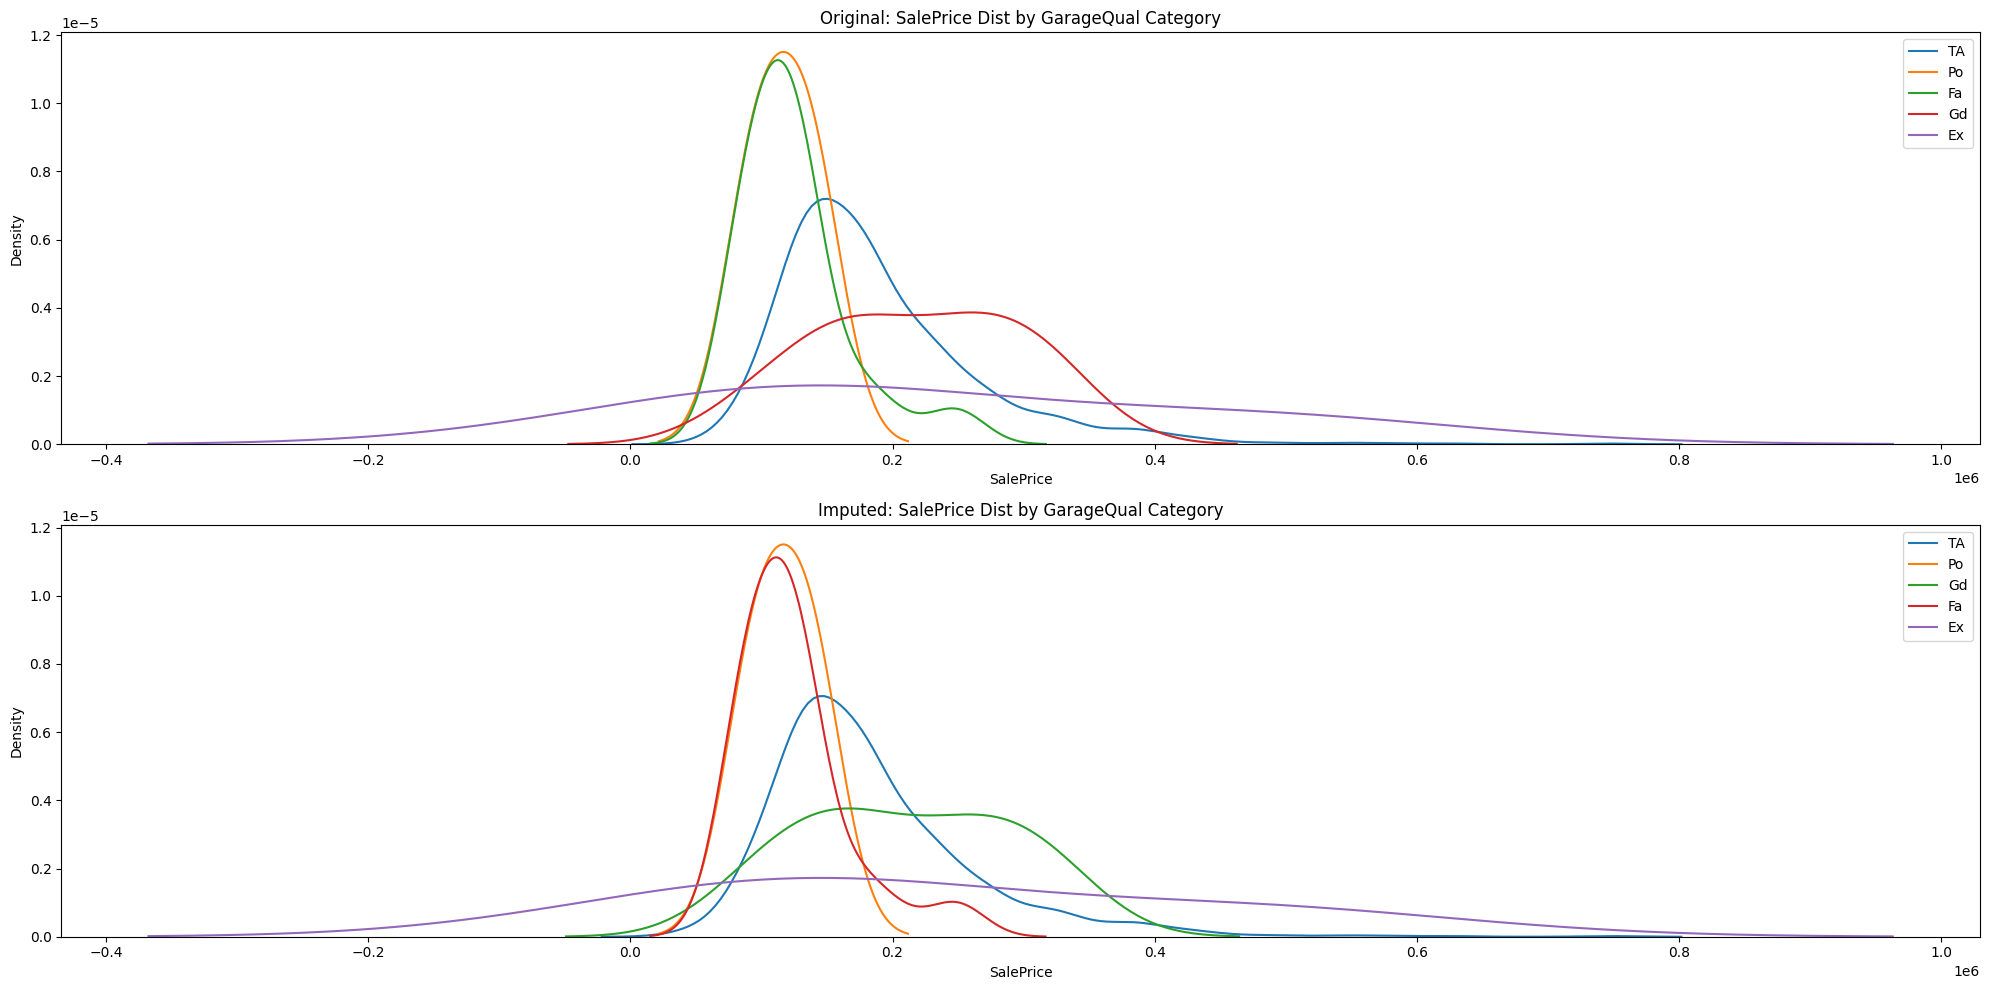

In [29]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
for category in x_train['GarageQual'].dropna().unique():
    sns.kdeplot(
        x_train[x_train['GarageQual'] == category]['SalePrice'], 
        label=category
    )
plt.title('Original: SalePrice Dist by GarageQual Category')
plt.legend()


plt.subplot(2, 1, 2)
for category in x_train['GarageQual_imputed'].dropna().unique():
    sns.kdeplot(
        x_train[x_train['GarageQual_imputed'] == category]['SalePrice'], 
        label=category
    )
plt.title('Imputed: SalePrice Dist by GarageQual Category')
plt.legend()

plt.tight_layout()
plt.show()

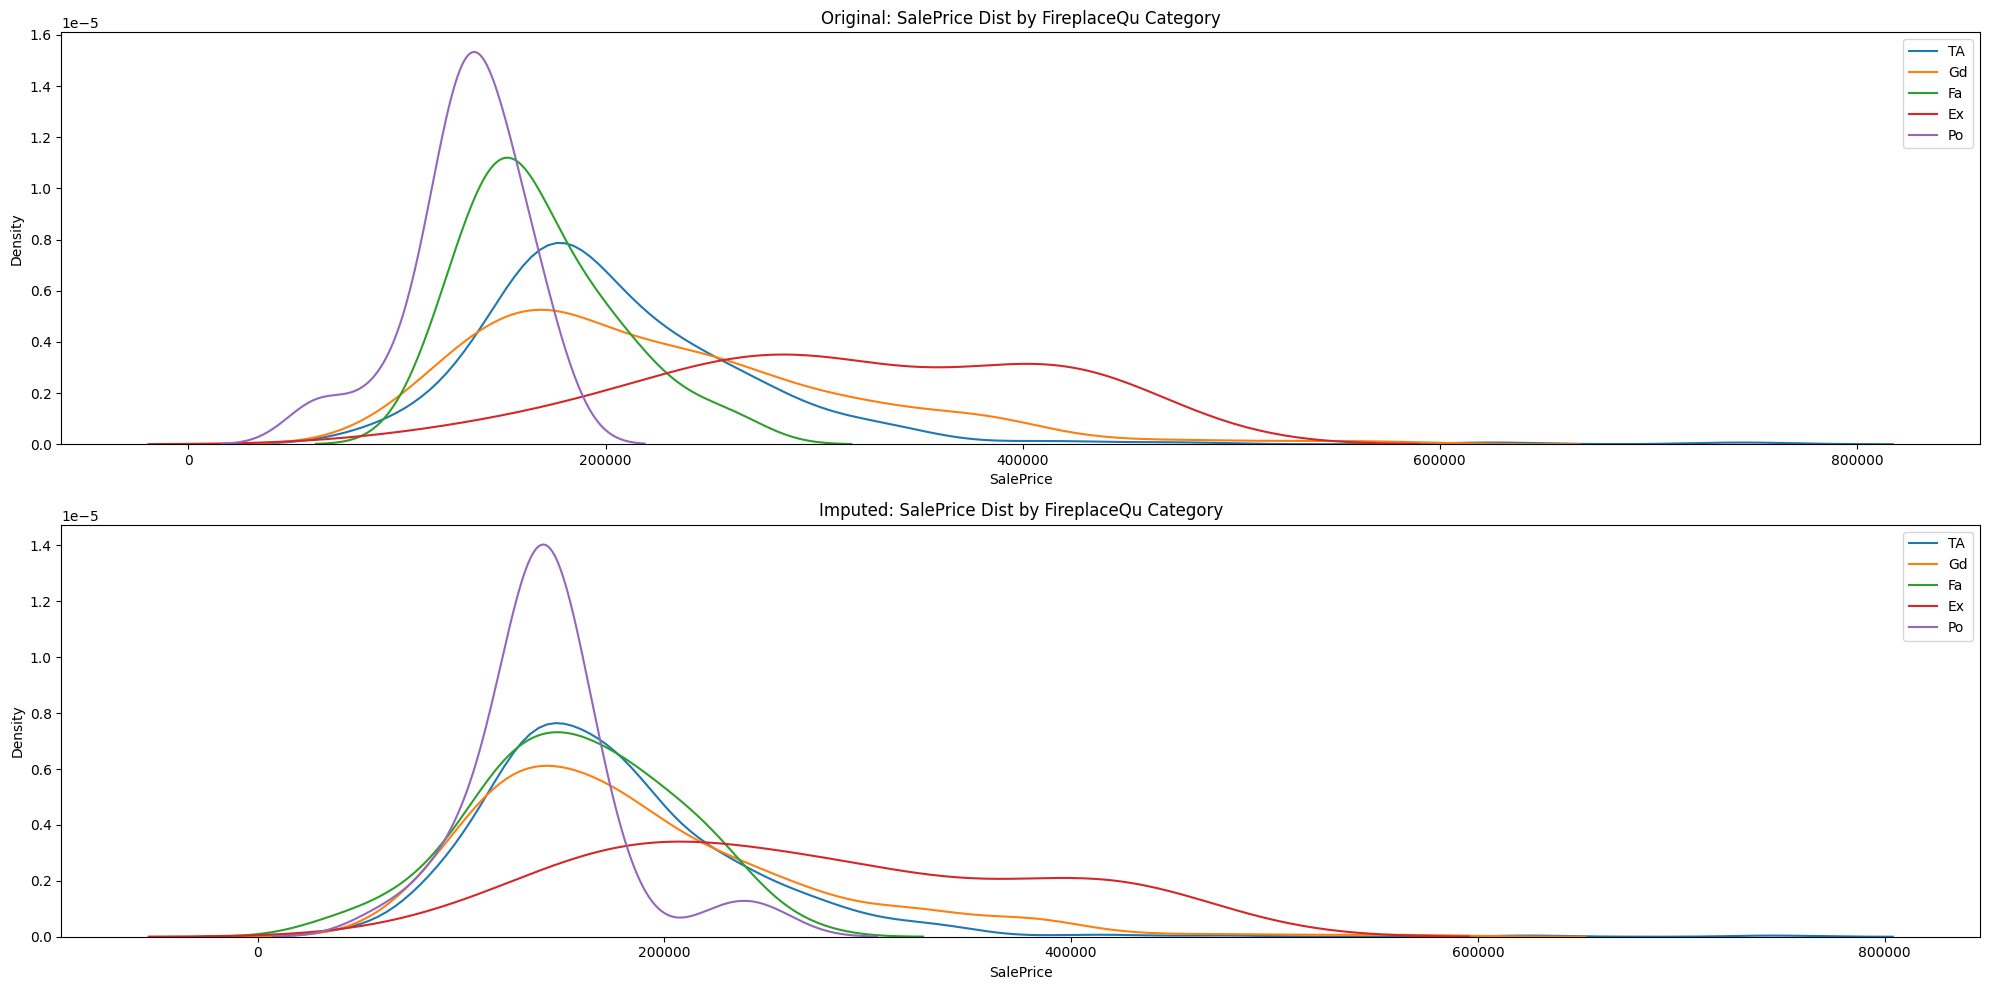

In [27]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
for category in x_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        x_train[x_train['FireplaceQu'] == category]['SalePrice'], 
        label=category
    )
plt.title('Original: SalePrice Dist by FireplaceQu Category')
plt.legend()


plt.subplot(2, 1, 2)
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'], 
        label=category
    )
plt.title('Imputed: SalePrice Dist by FireplaceQu Category')
plt.legend()

plt.tight_layout()
plt.show()